In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/temp_interactions.csv")
df

,user_id,book_id,is_read,rating,is_reviewed
0,0,830,1,4,1
1,0,826,1,4,1
2,0,823,1,3,1
3,0,822,0,0,1
4,0,365,1,5,0
...,...,...,...,...,...
433317,442595,16307,0,0,0
433318,442595,16195,0,0,0
433319,442596,5364,1,4,0
433320,442597,7348,0,0,0


In [22]:
books = pd.read_csv("/content/drive/MyDrive/selectedBooks.csv")
books

,book_id,title,ratings_count,author_id,average_rating,description,image_url,author_name,split_description,genres
0,3,Harry Potter and the Sorcerer's Stone (Harry P...,4765497,1077326,4.45,Harry Potter's life is miserable. His parents ...,https://images.gr-assets.com/books/1474154022m...,J.K. Rowling,"harry, potters, life, is, miserable, his, pare...","fantasy, paranormal, young-adult, fiction, chi..."
1,5907,The Hobbit,2099680,656983,4.25,In a hole in the ground there lived a hobbit. ...,https://images.gr-assets.com/books/1372847500m...,J.R.R. Tolkien,"in, a, hole, in, the, ground, there, lived, a,...","young-adult, fantasy, paranormal, children, fi..."
2,5,Harry Potter and the Prisoner of Azkaban (Harr...,1876252,1077326,4.53,Harry Potter's third year at Hogwarts is full ...,https://images.gr-assets.com/books/1499277281m...,J.K. Rowling,"harry, potters, third, year, at, hogwarts, is,...","fiction, children, fantasy, paranormal, young-..."
3,15881,Harry Potter and the Chamber of Secrets (Harry...,1821802,1077326,4.38,The Dursleys were so mean and hideous that sum...,https://images.gr-assets.com/books/1474169725m...,J.K. Rowling,"the, dursleys, were, so, mean, and, hideous, t...","fantasy, paranormal, young-adult, fiction, chi..."
4,34,The Fellowship of the Ring (The Lord of the Ri...,1813229,656983,4.34,"One Ring to rule them all, One Ring to find th...",https://images.gr-assets.com/books/1298411339m...,J.R.R. Tolkien,"one, ring, to, rule, them, all,, one, ring, to...","fantasy, paranormal, fiction, young-adult"
...,...,...,...,...,...,...,...,...,...,...
3066,3569016,The Boomerang Clue,201,123715,3.84,Librarian's Note: this is an alternate cover e...,https://images.gr-assets.com/books/1342317269m...,Agatha Christie,"librarians, note:, this, is, an, alternate, co...","mystery, thriller, crime, fiction, romance, hi..."
3067,11813376,Mother Earth Mother Board,201,545,4.36,The hacker tourist ventures forth across the w...,https://images.gr-assets.com/books/1357582773m...,Neal Stephenson,"the, hacker, tourist, ventures, forth, across,...","history, historical fiction, biography, non-fi..."
3068,19549137,"Crown of Midnight (Throne of Glass, #2)",201,3433047,4.49,12 hrs 24 mins\nShe is the greatest assassin h...,https://images.gr-assets.com/books/1387552634m...,Sarah J. Maas,"12, hrs, 24, mins, she, is, the, greatest, ass...","fantasy, paranormal, romance, young-adult, fic..."
3069,31847104,The Hitchhiker's Guide to the Galaxy (Hitchhik...,201,4,4.20,The Hitchhiker's Guide to the Galaxyhas been a...,https://images.gr-assets.com/books/1473188155m...,Douglas Adams,"the, hitchhikers, guide, to, the, galaxyhas, b...","fiction, fantasy, paranormal, young-adult"


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 433322 entries, 0 to 433321
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype
---  ------       --------------   -----
 0   user_id      433322 non-null  int64
 1   book_id      433322 non-null  int64
 2   is_read      433322 non-null  int64
 3   rating       433322 non-null  int64
 4   is_reviewed  433322 non-null  int64
dtypes: int64(5)
memory usage: 16.5 MB


In [ ]:
df["user_id"].value_counts()

165733    208
396456    156
339532    155
386880    146
59545     146
         ... 
76268       1
381458      1
170028      1
381455      1
344268      1
Name: user_id, Length: 101266, dtype: int64

In [ ]:
df["book_id"].value_counts()

7348      30776
7337      15436
10        11951
7332      11811
7349       8800
          ...  
239729       51
74377        51
276307       51
535757       51
34517        51
Name: book_id, Length: 581, dtype: int64

In [ ]:
df = df[df["rating"] > 0]

In [ ]:
df

,user_id,book_id,is_read,rating,is_reviewed
0,0,830,1,4,1
1,0,826,1,4,1
2,0,823,1,3,1
4,0,365,1,5,0
6,0,357,1,5,0
...,...,...,...,...,...
433306,442593,68524,1,4,1
433307,442593,16312,1,3,0
433311,442593,822,1,4,1
433316,442595,7348,1,5,0


In [ ]:
df["rating"] = df["rating"].values.astype(np.float32)

<ipython-input-30-9a38c35233bd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["rating"] = df["rating"].values.astype(np.float32)


In [ ]:
df

,user_id,book_id,is_read,rating,is_reviewed
0,0,830,1,4.0,1
1,0,826,1,4.0,1
2,0,823,1,3.0,1
4,0,365,1,5.0,0
6,0,357,1,5.0,0
...,...,...,...,...,...
433306,442593,68524,1,4.0,1
433307,442593,16312,1,3.0,0
433311,442593,822,1,4.0,1
433316,442595,7348,1,5.0,0


In [ ]:
df["user_id"].value_counts()

146501    38
320562    37
72944     30
184022    29
223329    27
          ..
207073     1
207077     1
207081     1
207089     1
442596     1
Name: user_id, Length: 72484, dtype: int64

In [ ]:
user_ids = df["user_id"].unique().tolist()

In [ ]:
book_ids = df["book_id"].unique().tolist()

In [ ]:
enumerate_userids = {x: i for i, x in enumerate(user_ids)}


In [ ]:
enumerate_bookids = {x: i for i, x in enumerate(book_ids)}

In [ ]:
enumerate_userids

{0: 0,
 11: 1,
 14: 2,
 20: 3,
 22: 4,
 24: 5,
 28: 6,
 30: 7,
 34: 8,
 50: 9,
 66: 10,
 75: 11,
 90: 12,
 91: 13,
 112: 14,
 117: 15,
 119: 16,
 124: 17,
 132: 18,
 134: 19,
 142: 20,
 161: 21,
 162: 22,
 166: 23,
 167: 24,
 186: 25,
 195: 26,
 200: 27,
 211: 28,
 225: 29,
 226: 30,
 246: 31,
 247: 32,
 251: 33,
 255: 34,
 260: 35,
 266: 36,
 270: 37,
 273: 38,
 280: 39,
 281: 40,
 282: 41,
 287: 42,
 292: 43,
 297: 44,
 306: 45,
 308: 46,
 309: 47,
 310: 48,
 311: 49,
 319: 50,
 321: 51,
 323: 52,
 325: 53,
 337: 54,
 343: 55,
 349: 56,
 355: 57,
 358: 58,
 362: 59,
 364: 60,
 366: 61,
 370: 62,
 379: 63,
 388: 64,
 391: 65,
 393: 66,
 394: 67,
 396: 68,
 397: 69,
 400: 70,
 405: 71,
 410: 72,
 415: 73,
 423: 74,
 425: 75,
 427: 76,
 430: 77,
 432: 78,
 433: 79,
 435: 80,
 438: 81,
 445: 82,
 450: 83,
 451: 84,
 456: 85,
 459: 86,
 460: 87,
 465: 88,
 469: 89,
 471: 90,
 475: 91,
 480: 92,
 490: 93,
 491: 94,
 492: 95,
 494: 96,
 495: 97,
 496: 98,
 497: 99,
 498: 100,
 500: 101,
 50

In [ ]:
enumerate_bookids

{830: 0,
 826: 1,
 823: 2,
 365: 3,
 357: 4,
 14: 5,
 7349: 6,
 12645: 7,
 11318: 8,
 10990: 9,
 10917: 10,
 10916: 11,
 8694: 12,
 14186: 13,
 14185: 14,
 14180: 15,
 14100: 16,
 14867: 17,
 14865: 18,
 15279: 19,
 15241: 20,
 5364: 21,
 15925: 22,
 17076: 23,
 17055: 24,
 16907: 25,
 30: 26,
 16427: 27,
 16424: 28,
 16368: 29,
 16366: 30,
 16361: 31,
 16358: 32,
 10: 33,
 16339: 34,
 16332: 35,
 16342: 36,
 18937: 37,
 16694: 38,
 21436: 39,
 12070: 40,
 822: 41,
 25106: 42,
 25105: 43,
 25104: 44,
 25103: 45,
 25102: 46,
 25101: 47,
 25100: 48,
 25099: 49,
 7337: 50,
 16306: 51,
 26046: 52,
 31319: 53,
 31309: 54,
 31299: 55,
 31092: 56,
 16422: 57,
 34540: 58,
 34507: 59,
 33342: 60,
 13152: 61,
 35736: 62,
 2015: 63,
 16308: 64,
 16307: 65,
 7332: 66,
 16312: 67,
 16326: 68,
 45277: 69,
 12618: 70,
 45107: 71,
 45102: 72,
 45101: 73,
 45100: 74,
 43927: 75,
 43926: 76,
 43924: 77,
 15350: 78,
 16195: 79,
 49596: 80,
 7348: 81,
 17327: 82,
 41905: 83,
 5912: 84,
 7346: 85,
 61651: 

In [ ]:
df["user_idx"] = df["user_id"].map(enumerate_userids)

<ipython-input-39-5fa56eae2931>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["user_idx"] = df["user_id"].map(enumerate_userids)


In [ ]:
df["book_idx"] = df["book_id"].map(enumerate_bookids)

<ipython-input-40-78694fd628e4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["book_idx"] = df["book_id"].map(enumerate_bookids)


In [ ]:
df

,user_id,book_id,is_read,rating,is_reviewed,user_idx,book_idx
0,0,830,1,4.0,1,0,0
1,0,826,1,4.0,1,0,1
2,0,823,1,3.0,1,0,2
4,0,365,1,5.0,0,0,3
6,0,357,1,5.0,0,0,4
...,...,...,...,...,...,...,...
433306,442593,68524,1,4.0,1,72481,115
433307,442593,16312,1,3.0,0,72481,67
433311,442593,822,1,4.0,1,72481,41
433316,442595,7348,1,5.0,0,72482,81


In [ ]:
x = df[['user_idx', 'book_idx']].values
x

array([[    0,     0],
       [    0,     1],
       [    0,     2],
       ...,
       [72481,    41],
       [72482,    81],
       [72483,    21]])

In [ ]:
y = df['rating'].values
y.max(), y.min()

(5.0, 1.0)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

reshaped_y = y.reshape(-1, 1)

y_norm = scaler.fit_transform(reshaped_y)

y_norm.max(), y_norm.min()

(1.0, 0.0)

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y_norm, test_size=0.2, random_state=42)

In [ ]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((143035, 2), (143035, 1), (35759, 2), (35759, 1))

In [ ]:
#emedding
user_size = df["user_id"].nunique()

book_size = df["book_id"].nunique()
user_size, book_size

(72484, 580)

In [ ]:
tf.random.set_seed(42)
embedding_size = 100
user_input = tf.keras.layers.Input(shape=[1])
user_embed_layer =tf.keras.layers.Embedding(user_size, embedding_size)(user_input)
users = tf.keras.layers.Flatten()(user_embed_layer)
book_input = tf.keras.layers.Input(shape=[1])
book_embed_layer = tf.keras.layers.Embedding(book_size, embedding_size)(book_input)
books = tf.keras.layers.Flatten()(book_embed_layer)
dot_product = tf.keras.layers.Dot(axes=1)(inputs=[users, books],)


layer_1 = tf.keras.layers.Dense(32, activation='relu')(dot_product)
layer_2 = tf.keras.layers.Dense(32, activation ='relu')(layer_1)
layer_3 = tf.keras.layers.Dense(1, activation='relu')(layer_2)


model = tf.keras.Model([user_input, book_input], layer_3)

model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.Adam(),
              metrics =["mae"])


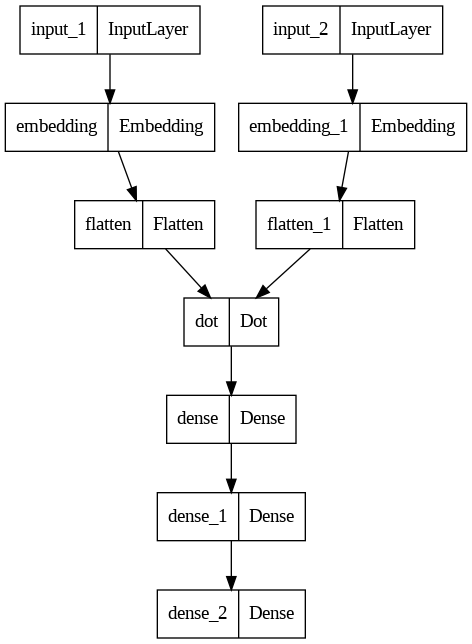

In [ ]:
tf.keras.utils.plot_model(model)

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 1)]          0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 1)]          0           []                               
                                                                                                  
 embedding (Embedding)          (None, 1, 100)       7248400     ['input_1[0][0]']                
                                                                                                  
 embedding_1 (Embedding)        (None, 1, 100)       58000       ['input_2[0][0]']                
                                                                                              

In [ ]:
model.fit([x_train[:,0], x_train[:,1]], y_train, epochs=50, validation_split=0.2, batch_size=64)

Epoch 1/50
1788/1788 [==============================] - 185s 103ms/step - loss: 0.1920 - mae: 0.1920 - val_loss: 0.1817 - val_mae: 0.1817
Epoch 2/50
1788/1788 [==============================] - 179s 100ms/step - loss: 0.1824 - mae: 0.1824 - val_loss: 0.1808 - val_mae: 0.1808
Epoch 3/50
1788/1788 [==============================] - 184s 103ms/step - loss: 0.1635 - mae: 0.1635 - val_loss: 0.1819 - val_mae: 0.1819
Epoch 4/50
1788/1788 [==============================] - 172s 96ms/step - loss: 0.1442 - mae: 0.1442 - val_loss: 0.1828 - val_mae: 0.1828
Epoch 5/50
1788/1788 [==============================] - 190s 106ms/step - loss: 0.1349 - mae: 0.1349 - val_loss: 0.1878 - val_mae: 0.1878
Epoch 6/50
1788/1788 [==============================] - 187s 104ms/step - loss: 0.1219 - mae: 0.1219 - val_loss: 0.2451 - val_mae: 0.2451
Epoch 7/50
1788/1788 [==============================] - 183s 102ms/step - loss: 0.0955 - mae: 0.0955 - val_loss: 0.2600 - val_mae: 0.2600
Epoch 8/50
1788/1788 [=============

In [ ]:
model.evaluate([x_test[:,0], x_test[:, 1]], y_test)

1118/1118 [==============================] - 2s 1ms/step - loss: 0.2551 - mae: 0.2551


[0.25511929392814636, 0.25511929392814636]

In [ ]:
model.save('model_1.h5')

In [ ]:
tf.random.set_seed(42)
embedding_size = 100
user_input = tf.keras.layers.Input(shape=[1])
user_embed_layer =tf.keras.layers.Embedding(user_size, embedding_size, embeddings_initializer="he_normal", embeddings_regularizer=tf.keras.regularizers.l2(1e-5))(user_input)
users = tf.keras.layers.Flatten()(user_embed_layer)
book_input = tf.keras.layers.Input(shape=[1])
book_embed_layer = tf.keras.layers.Embedding(book_size, embedding_size, embeddings_initializer="he_normal", embeddings_regularizer=tf.keras.regularizers.l2(1e-5))(book_input)
books = tf.keras.layers.Flatten()(book_embed_layer)
dot_product = tf.keras.layers.Dot(axes=1)(inputs=[users, books],)


layer_1 = tf.keras.layers.Dense(512, activation='relu', kernel_initializer="he_normal")(dot_product)
dropout_1 = tf.keras.layers.Dropout(0.5)(layer_1)
layer_2 = tf.keras.layers.Dense(128, activation ='relu', kernel_initializer="he_normal")(dropout_1)
dropout_2 = tf.keras.layers.Dropout(0.2)(layer_2)
layer_3 = tf.keras.layers.Dense(64, activation='relu',kernel_initializer="he_normal")(layer_2)
layer_4 = tf.keras.layers.Dense(32, activation='relu',kernel_initializer="he_normal")(layer_3)
layer_5 = tf.keras.layers.Dense(1,activation='relu' )(layer_4)


model_2 = tf.keras.Model([user_input, book_input], layer_5)

model_2.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.Adam(),
              metrics =["mae"])

In [ ]:
model_2.fit([x_train[:,0], x_train[:,1]], y_train, epochs=15, validation_split=0.2, batch_size=64)


Epoch 1/15
1788/1788 [==============================] - 257s 142ms/step - loss: 0.2256 - mae: 0.2216 - val_loss: 0.1886 - val_mae: 0.1838
Epoch 2/15
1788/1788 [==============================] - 220s 123ms/step - loss: 0.1880 - mae: 0.1837 - val_loss: 0.1855 - val_mae: 0.1818
Epoch 3/15
1788/1788 [==============================] - 223s 124ms/step - loss: 0.1862 - mae: 0.1820 - val_loss: 0.1847 - val_mae: 0.1809
Epoch 4/15
1788/1788 [==============================] - 222s 124ms/step - loss: 0.1837 - mae: 0.1794 - val_loss: 0.1855 - val_mae: 0.1815
Epoch 5/15
1788/1788 [==============================] - 221s 123ms/step - loss: 0.1820 - mae: 0.1782 - val_loss: 0.1858 - val_mae: 0.1822
Epoch 6/15
1788/1788 [==============================] - 232s 130ms/step - loss: 0.1814 - mae: 0.1778 - val_loss: 0.1851 - val_mae: 0.1814
Epoch 7/15
1788/1788 [==============================] - 235s 131ms/step - loss: 0.1807 - mae: 0.1773 - val_loss: 0.1843 - val_mae: 0.1808
Epoch 8/15
1788/1788 [============

In [ ]:
model_2.evaluate([x_test[:,0], x_test[:, 1]], y_test)

1118/1118 [==============================] - 17s 16ms/step - loss: 0.1897 - mae: 0.1846


[0.18966972827911377, 0.1845940798521042]

In [ ]:
model_2.save('model_2.h5')

In [ ]:
tf.random.set_seed(42)
embedding_size = 100
user_input = tf.keras.layers.Input(shape=[1])
user_embed_layer =tf.keras.layers.Embedding(user_size, embedding_size, embeddings_initializer="he_normal", embeddings_regularizer=tf.keras.regularizers.l2(1e-6))(user_input)
users = tf.keras.layers.Flatten()(user_embed_layer)
book_input = tf.keras.layers.Input(shape=[1])
book_embed_layer = tf.keras.layers.Embedding(book_size, embedding_size, embeddings_initializer="he_normal", embeddings_regularizer=tf.keras.regularizers.l2(1e-6))(book_input)
books = tf.keras.layers.Flatten()(book_embed_layer)
dot_product = tf.keras.layers.dot(inputs=[users, books],axes=1)



layer_2 = tf.keras.layers.Dense(128, activation ='relu', kernel_initializer="he_normal")(dot_product)
dropout_2 = tf.keras.layers.Dropout(0.2)(layer_2)
layer_3 = tf.keras.layers.Dense(64, activation='relu',kernel_initializer="he_normal")(dropout_2)
layer_4 = tf.keras.layers.Dense(32, activation='relu',kernel_initializer="he_normal")(layer_3)
layer_5 = tf.keras.layers.Dense(1,activation='relu' )(layer_4)


model_3 = tf.keras.Model([user_input, book_input], layer_5)

model_3.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.Adam(),
              metrics =["mae"])

In [ ]:
model_3.fit([x_train[:,0], x_train[:,1]], y_train, epochs=15, validation_split=0.2, batch_size=64)


Epoch 1/15
1788/1788 [==============================] - 113s 63ms/step - loss: 0.1920 - mae: 0.1906 - val_loss: 0.1862 - val_mae: 0.1835
Epoch 2/15
1788/1788 [==============================] - 113s 63ms/step - loss: 0.1868 - mae: 0.1842 - val_loss: 0.1829 - val_mae: 0.1806
Epoch 3/15
1788/1788 [==============================] - 112s 63ms/step - loss: 0.1795 - mae: 0.1766 - val_loss: 0.1850 - val_mae: 0.1816
Epoch 4/15
1788/1788 [==============================] - 112s 63ms/step - loss: 0.1639 - mae: 0.1599 - val_loss: 0.1859 - val_mae: 0.1816
Epoch 5/15
1788/1788 [==============================] - 112s 63ms/step - loss: 0.1510 - mae: 0.1466 - val_loss: 0.1877 - val_mae: 0.1830
Epoch 6/15
1788/1788 [==============================] - 112s 63ms/step - loss: 0.1462 - mae: 0.1408 - val_loss: 0.2351 - val_mae: 0.2283
Epoch 7/15
1788/1788 [==============================] - 110s 62ms/step - loss: 0.1561 - mae: 0.1488 - val_loss: 0.2353 - val_mae: 0.2275
Epoch 8/15
1788/1788 [===================

In [ ]:
model_3.evaluate([x_test[:,0], x_test[:, 1]], y_test)

1118/1118 [==============================] - 8s 7ms/step - loss: 0.2567 - mae: 0.2496


[0.256746381521225, 0.24964377284049988]

In [ ]:
preds = model_3.predict([x_train[:, 0], x_train[:, 1]])
preds

4470/4470 [==============================] - 5s 969us/step


array([[0.49945617],
       [0.74725264],
       [0.50170165],
       ...,
       [0.4991414 ],
       [0.74756175],
       [0.99979097]], dtype=float32)

In [ ]:
books

,book_id,title,ratings_count,author_id,average_rating,description,image_url,author_name,split_description,genres
14,3473,A Walk to Remember,549725,2345,4.15,"Every April, when the wind blows from the sea ...",https://images.gr-assets.com/books/1385738968m...,Nicholas Sparks,"every, april,, when, the, wind, blows, from, t...","fiction, romance, history, historical fiction,..."
46,34497,"The Color of Magic (Discworld, #1; Rincewind #1)",195805,1654,3.98,"Terry Pratchett's profoundly irreverent, bests...",https://images.gr-assets.com/books/1407111017m...,Terry Pratchett,"terry, pratchetts, profoundly, irreverent,, be...","fantasy, paranormal, fiction, comics, graphic,..."
199,6588,"The Big Bad Wolf (Alex Cross, #9)",37535,3780,3.97,Alex Cross battles the most ruthless and power...,https://images.gr-assets.com/books/1388328154m...,James Patterson,"alex, cross, battles, the, most, ruthless, and...","mystery, thriller, crime, fiction"
210,22320,"Pattern Recognition (Blue Ant, #1)",35393,9226,3.86,"Cayce Pollard is an expensive, spookily intuit...",https://images.gr-assets.com/books/1288326931m...,William Gibson,"cayce, pollard, is, an, expensive,, spookily, ...","fiction, mystery, thriller, crime, fantasy, pa..."
489,197743,"Lady Sophia's Lover (Bow Street Runners, #2)",11983,27847,3.95,Why is Lady Sophia looking for a lover?\nAnd c...,https://images.gr-assets.com/books/1348288082m...,Lisa Kleypas,"why, is, lady, sophia, looking, for, a, lover?...","history, historical fiction, biography, romanc..."
1002,64119,The Meaning of Liff,3029,4,3.94,"In life and, indeed, in liff, there are many h...",https://images.gr-assets.com/books/1333887539m...,Douglas Adams,"in, life, and,, indeed,, in, liff,, there, are...","non-fiction, fiction, fantasy, paranormal, com..."
1416,17327,Angels and Visitations: A Miscellany,1420,1221698,4.15,A collection of Neil Gaiman's short fiction; a...,https://images.gr-assets.com/books/1461535568m...,Neil Gaiman,"a, collection, of, neil, gaimans, short, ficti...","fantasy, paranormal, fiction, poetry, comics, ..."
1583,16,The Hitchhiker's Guide to the Galaxy (Hitchhik...,1093,4,4.20,Don't leave Earth without this hilarious inter...,https://images.gr-assets.com/books/1282925073m...,Douglas Adams,"dont, leave, earth, without, this, hilarious, ...","fiction, fantasy, paranormal, young-adult"
1956,16422,Poirot Investigates,625,123715,4.07,First there was the mystery of the film star a...,https://images.gr-assets.com/books/1309284512m...,Agatha Christie,"first, there, was, the, mystery, of, the, film...","mystery, thriller, crime, fiction, history, hi..."
2811,343803,Harry Potter and the Order of the Phoenix (Har...,249,1077326,4.47,"The next volume in the thrilling, moving, best...",https://images.gr-assets.com/books/1498753012m...,J.K. Rowling,"the, next, volume, in, the, thrilling,, moving...","fantasy, paranormal, children, fiction, young-..."


In [ ]:
df

,user_id,book_id,is_read,rating,is_reviewed,user_idx,book_idx
0,0,830,1,4.0,1,0,0
1,0,826,1,4.0,1,0,1
2,0,823,1,3.0,1,0,2
4,0,365,1,5.0,0,0,3
6,0,357,1,5.0,0,0,4
...,...,...,...,...,...,...,...
433306,442593,68524,1,4.0,1,72481,115
433307,442593,16312,1,3.0,0,72481,67
433311,442593,822,1,4.0,1,72481,41
433316,442595,7348,1,5.0,0,72482,81


In [ ]:
user_id = 0
books_readby_user = df[df.user_id == user_id]
books_readby_user


,user_id,book_id,is_read,rating,is_reviewed,user_idx,book_idx
0,0,830,1,4.0,1,0,0
1,0,826,1,4.0,1,0,1
2,0,823,1,3.0,1,0,2
4,0,365,1,5.0,0,0,3
6,0,357,1,5.0,0,0,4
13,0,14,1,5.0,1,0,5


In [ ]:
books_not_read = books[~books["book_id"].isin(books_readby_user.book_id.values)]["book_id"]
books_not_read


0              3
1           5907
2              5
3          15881
4             34
          ...   
3066     3569016
3067    11813376
3068    19549137
3069    31847104
3070     9920532
Name: book_id, Length: 3065, dtype: int64

In [ ]:
filtered_books_not_read = list(set(books_not_read).intersection(set(enumerate_bookids.keys())))
filtered_books_not_read

[696320,
 2049,
 2050,
 3,
 1,
 2053,
 2054,
 7,
 6,
 5,
 10,
 11,
 79884,
 13,
 79885,
 2,
 16,
 17,
 165908,
 448534,
 165913,
 151579,
 30,
 31,
 165919,
 34,
 35,
 16422,
 16424,
 16427,
 45100,
 45101,
 45102,
 16428,
 45107,
 22581,
 397369,
 22586,
 397370,
 161852,
 22592,
 430146,
 22595,
 374855,
 18510,
 18511,
 18512,
 2052,
 106585,
 63580,
 43106,
 235620,
 239729,
 569465,
 104596,
 104602,
 522397,
 4255,
 14497,
 14501,
 250024,
 682153,
 317615,
 233670,
 57546,
 233674,
 92364,
 92367,
 233679,
 63697,
 61651,
 92377,
 299226,
 450779,
 594137,
 45277,
 63720,
 282857,
 194800,
 538865,
 282872,
 461055,
 358663,
 2323,
 2329,
 131359,
 276767,
 131366,
 215344,
 86321,
 16694,
 4407,
 12617,
 12618,
 10572,
 100692,
 12630,
 12645,
 149863,
 360,
 67948,
 149873,
 67955,
 31092,
 67958,
 67959,
 53625,
 145786,
 67961,
 145785,
 67971,
 16790,
 67996,
 340381,
 59805,
 59810,
 59813,
 166314,
 59822,
 59825,
 68021,
 68022,
 59830,
 797113,
 49596,
 92605,
 6588,
 9

In [ ]:
books_not_read_by_user = [[enumerate_bookids.get(x)] for x in filtered_books_not_read]
books_not_read_by_user

[[415],
 [87],
 [407],
 [303],
 [545],
 [139],
 [401],
 [221],
 [540],
 [557],
 [33],
 [313],
 [130],
 [397],
 [514],
 [575],
 [490],
 [99],
 [209],
 [573],
 [332],
 [508],
 [26],
 [138],
 [428],
 [282],
 [96],
 [57],
 [28],
 [27],
 [74],
 [73],
 [72],
 [285],
 [71],
 [237],
 [325],
 [158],
 [324],
 [316],
 [88],
 [528],
 [231],
 [348],
 [206],
 [268],
 [267],
 [559],
 [167],
 [533],
 [163],
 [446],
 [558],
 [452],
 [539],
 [166],
 [372],
 [383],
 [367],
 [487],
 [565],
 [430],
 [350],
 [250],
 [91],
 [249],
 [147],
 [146],
 [248],
 [205],
 [86],
 [145],
 [433],
 [441],
 [542],
 [69],
 [94],
 [271],
 [228],
 [561],
 [471],
 [500],
 [563],
 [412],
 [151],
 [286],
 [416],
 [466],
 [516],
 [135],
 [38],
 [152],
 [414],
 [70],
 [571],
 [207],
 [421],
 [7],
 [199],
 [379],
 [410],
 [198],
 [422],
 [56],
 [223],
 [530],
 [287],
 [260],
 [335],
 [432],
 [274],
 [258],
 [477],
 [293],
 [426],
 [354],
 [107],
 [212],
 [112],
 [413],
 [261],
 [291],
 [456],
 [457],
 [80],
 [144],
 [149],
 [143],

In [ ]:
user_idx = enumerate_userids.get(user_id)
user_idx

0

In [ ]:
user_books = np.hstack(([[user_idx]] * len(books_not_read_by_user), books_not_read_by_user ))
user_books

array([[  0, 415],
       [  0,  87],
       [  0, 407],
       ...,
       [  0, 279],
       [  0, 405],
       [  0, 486]])

In [ ]:
ratings = model_3.predict([user_books[:, 0], user_books[:, 1]]).flatten()
ratings

18/18 [==============================] - 0s 2ms/step


array([0.56076133, 0.9884494 , 0.747549  , 0.7474889 , 0.49901295,
       1.0016865 , 0.99950653, 0.50050104, 0.49951375, 0.4992746 ,
       0.7443548 , 0.49901295, 0.4992138 , 0.74745613, 0.5003893 ,
       0.4995811 , 0.49904293, 0.49901295, 0.51139563, 0.4995811 ,
       0.49903256, 0.59275544, 0.64506507, 0.6430519 , 0.49907357,
       0.74742854, 0.747497  , 0.7474128 , 0.51502156, 0.747529  ,
       0.53391975, 0.49901295, 0.49923712, 0.4993047 , 0.51184326,
       0.49901295, 0.49901295, 0.74749076, 0.49911863, 0.49901295,
       0.7474828 , 0.49999827, 0.4997564 , 0.9997153 , 0.49978995,
       0.49916202, 0.74740285, 0.5289433 , 0.50537866, 0.51157606,
       0.49904656, 0.5644944 , 0.49958122, 0.5014316 , 0.74751997,
       0.49901295, 0.5010524 , 0.5003782 , 0.50098294, 0.49990547,
       0.4995811 , 0.49931812, 0.49983382, 0.49939352, 0.49901295,
       0.49901295, 0.50300676, 0.74703336, 0.5174892 , 0.50007856,
       0.98038703, 1.0003595 , 0.4999199 , 0.49901295, 0.49901

In [ ]:
rating_idxs = np.argsort(ratings)[-10:][::-1]
rating_idxs

array([  5, 251, 479, 549, 520, 325, 132,  90, 555, 377])

In [ ]:
recommendations_idx = [enumerate_bookids_reverse.get(books_not_read_by_user[x][0]) for x in rating_idxs]
recommendations_idx

[2053, 15241, 34526, 16326, 1879, 7347, 92625, 16694, 16342, 15721]

In [ ]:
books = books[books["book_id"].isin(recommendations_idx)]
for index, row in books.iterrows():
    values = [row['title'], row["description"], row['image_url'], row['author_name'], row["genres"]]
    print(values)

['The Two Towers (The Lord of the Rings, #2)', 'The Fellowship was scattered. Some were bracing hopelessly for war against the ancient evil of Sauron. Some were contending with the treachery of the wizard Saruman. Only Frodo and Sam were left to take the accursed Ring of Power to be destroyed in Mordor-the dark Kingdom where Sauron was supreme. Their guide was Gollum, deceitful and lust-filled, slave to the corruption of the Ring. Thus continues the magnificent, bestselling tale of adventure begun in The Fellowship of the Ring, which reaches its soul-stirring climax in The Return of the King.', 'https://images.gr-assets.com/books/1298415523m/15241.jpg', 'J.R.R. Tolkien', 'fantasy, paranormal, fiction, young-adult']
['Death in the Clouds (Hercule Poirot, #12)', 'A woman is killed by a poisoned dart in the enclosed confines of a commercial passeneger plane...\nFrom seat No.9, Hercule Poirot was ideally placed to observe his fellow air passengers. Over to his right sat a pretty young woma

In [ ]:
user_id = 0

def recommend_book_nn(books, user_id):
  results = []
  books_readby_user = df[df.user_id == user_id]
  books_not_read = books[~books["book_id"].isin(books_readby_user.book_id.values)]["book_id"]
  filtered_books_not_read = list(set(books_not_read).intersection(set(enumerate_bookids.keys())))
  books_not_read_by_user = [[enumerate_bookids.get(x)] for x in filtered_books_not_read]
  user_idx = enumerate_userids.get(user_id)
  user_books = np.hstack(([[user_idx]] * len(books_not_read_by_user), books_not_read_by_user ))
  ratings = model_3.predict([user_books[:, 0], user_books[:, 1]]).flatten()
  rating_idxs = np.argsort(ratings)[-10:][::-1]
  recommendations_idx = [enumerate_bookids_reverse.get(books_not_read_by_user[x][0]) for x in rating_idxs]

  books = books[books["book_id"].isin(recommendations_idx)]

  for index, row in books.iterrows():
    values = [row['title'], row["description"], row['image_url'], row['author_name'], row["genres"]]
    results.append(values)



  return results




In [ ]:
# books_readby_user
# books_not_read_by_user


In [ ]:
user_idx = enumerate_userids.get(user_id)
user_idx


0

In [ ]:
user_books = np.hstack(([[user_idx]] * len(books_not_read_by_user), books_not_read_by_user ))

In [ ]:
user_books

array([[  0, 415],
       [  0,  87],
       [  0, 407],
       ...,
       [  0, 279],
       [  0, 405],
       [  0, 486]])

In [ ]:
ratings = model.predict([user_books[:, 0], user_books[:, 1]]).flatten()
ratings

18/18 [==============================] - 0s 5ms/step


array([4.6977011e-04, 1.1845608e-03, 0.0000000e+00, 0.0000000e+00,
       9.8419120e-04, 0.0000000e+00, 6.3855830e-04, 0.0000000e+00,
       2.0288245e-04, 0.0000000e+00, 8.3571987e-04, 0.0000000e+00,
       0.0000000e+00, 5.3918373e-04, 0.0000000e+00, 7.3275639e-04,
       2.8563549e-03, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       1.4679092e-03, 0.0000000e+00, 0.0000000e+00, 1.6529376e-03,
       0.0000000e+00, 6.7108904e-04, 0.0000000e+00, 3.2843242e-03,
       2.7045485e-04, 1.4060440e-03, 0.0000000e+00, 1.9495850e-04,
       7.3499221e-04, 0.0000000e+00, 2.6914119e-04, 1.8526574e-03,
       0.0000000e+00, 1.5801450e-03, 1.7216362e-03, 1.0384870e-03,
       0.0000000e+00, 0.0000000e+00, 2.4551197e-03, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 7.1872177e-04,
       5.3509988e-04, 9.6471037e-04, 3.6934880e-04, 6.7227590e-04,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 9.4760925e-04,
       0.0000000e+00, 1.2569189e-03, 5.0561980e-04, 0.0000000e

In [ ]:
rating_idxs = np.argsort(ratings)[-10:][::-1]

In [ ]:
rating_idxs

array([387, 499, 272,  27, 469, 487, 308, 177, 126,  16])

In [ ]:
# books_not_read_by_user[387][0]

472

In [ ]:
enumerate_bookids_reverse = {i: x for i, x in enumerate(book_ids)}
# enumerate_bookids_reverse


In [ ]:
enumerate_bookids_reverse.get(books_not_read_by_user[387][0])

3473

In [ ]:
recommendations_idx = [enumerate_bookids_reverse.get(books_not_read_by_user[x][0]) for x in rating_idxs]

In [ ]:
recommendations_idx

[3473, 22320, 17327, 16422, 34497, 343803, 197743, 64119, 6588, 16]

In [ ]:
i  = recommend_book_nn(books=books, user_id=0)

1/1 [==============================] - 0s 19ms/step


In [ ]:
i[0]

['A Walk to Remember',
 "Every April, when the wind blows from the sea and mingles with the scent of lilacs, Landon Carter remembers his last year at Beaufort High. It was 1958, and Landon had already dated a girl or two. He even swore that he had once been in love. Certainly the last person in town he thought he'd fall for was Jamie Sullivan, the daughter of the town's Baptist minister.\nA quiet girl who always carried a Bible with her schoolbooks, Jamie seemed content living in a world apart from the other teens. She took care of her widowed father, rescued hurt animals, and helped out at the local orphanage. No boy had ever asked her out. Landon would never have dreamed of it.\nThen a twist of fate made Jamie his partner for the homecoming dance, and Landon Carter's life would never be the same. Being with Jamie would show him the depths of the human heart and lead him to a decision so stunning it would send him irrevocably on the road to manhood...\nDid You Know?-\nThat Jamie was n

In [ ]:
# user_id = 0
# results = []
# def recommend_book_nn(books):
#   recs = []
#   books_readby_user = df[df.user_id == user_id]
#   books_not_read = books[~books["book_id"].isin(books_readby_user.book_id.values)]["book_id"]
#   filtered_books_not_read = list(set(books_not_read).intersection(set(enumerate_bookids.keys())))
#   books_not_read_by_user = [[enumerate_bookids.get(x)] for x in filtered_books_not_read]
#   user_idx = enumerate_userids.get(user_id)
#   user_books = np.hstack(([[user_idx]] * len(books_not_read_by_user), books_not_read_by_user ))
#   ratings = model.predict([user_books[:, 0], user_books[:, 1]]).flatten()
#   rating_idxs = np.argsort(ratings)[-10:][::-1]
#   recommendations_idx = [enumerate_bookids_reverse.get(books_not_read_by_user[x][0]) for x in rating_idxs]

#   books = books[books["book_id"].isin(recommendations_idx)]

#   for index, row in books.iterrows():
#     values = [row['title'], row["description"], row['image_url'], row['author_name'], row["genres"]]
#     results.append(values)



#   return results
import pickle
# pickle.dump(books, open('nn_books.pkl', 'wb'))
# pickle.dump(enumerate_bookids, open('enumerate_bookids.pkl', 'wb'))
# pickle.dump(enumerate_userids, open('enumerate_userids.pkl', 'wb'))
# pickle.dump(enumerate_bookids_reverse, open('enumerate_bookids_reverse.pkl', 'wb'))
# pickle.dump(df, open('nn_ratings.pkl', 'wb'))
# pickle.dump(books, open('nn_books_2.pkl', 'wb'))

In [ ]:
# model_3.save("model_3.h5")

In [ ]:
user_id

0

In [ ]:
df[df["user_id"]==user_id]

,user_id,book_id,is_read,rating,is_reviewed,user_idx,book_idx
0,0,830,1,4.0,1,0,0
1,0,826,1,4.0,1,0,1
2,0,823,1,3.0,1,0,2
4,0,365,1,5.0,0,0,3
6,0,357,1,5.0,0,0,4
13,0,14,1,5.0,1,0,5


In [ ]:
b = books[books["book_id"].isin(d.book_id.values)]
b

,book_id,title,ratings_count,author_id,average_rating,description,image_url,author_name,split_description,genres
54,830,Snow Crash,179029,545,4.02,"In reality, Hiro Protagonist delivers pizza fo...",https://images.gr-assets.com/books/1477624625m...,Neal Stephenson,"in, reality,, hiro, protagonist, delivers, piz...","fiction, fantasy, paranormal, mystery, thrille..."
99,365,Dirk Gently's Holistic Detective Agency (Dirk ...,91027,4,3.97,"What do a dead cat, a computer whiz-kid, an El...",https://images.gr-assets.com/books/1404697381m...,Douglas Adams,"what, do, a, dead, cat,, a, computer, whiz-kid...","fiction, fantasy, paranormal, mystery, thrille..."
136,357,The Long Dark Tea-Time of the Soul (Dirk Gentl...,60364,4,4.05,When a passenger check-in desk at London's Hea...,https://images.gr-assets.com/books/1388257271m...,Douglas Adams,"when, a, passenger, check-in, desk, at, london...","fiction, fantasy, paranormal, mystery, thrille..."
258,823,"Quicksilver (The Baroque Cycle, #1)",28102,545,3.92,"Quicksilveris the story of Daniel Waterhouse, ...",https://images.gr-assets.com/books/1377095669m...,Neal Stephenson,"quicksilveris, the, story, of, daniel, waterho...","fiction, history, historical fiction, biograph..."
863,826,The Big U,4300,545,3.24,The New York Times Book Reviewcalled Neal Step...,https://images.gr-assets.com/books/1407709321m...,Neal Stephenson,"the, new, york, times, book, reviewcalled, nea...","fiction, fantasy, paranormal, mystery, thrille..."
922,14,The Hitchhiker's Guide to the Galaxy (Hitchhik...,3656,4,4.20,Seconds before the Earth is demolished to make...,https://images.gr-assets.com/books/1414351529m...,Douglas Adams,"seconds, before, the, earth, is, demolished, t...","fiction, fantasy, paranormal, young-adult"


In [ ]:
def get_books_rated_by_user():
  results=[]
  user_id = 0
  user_ratings_data = df[df["user_id"]==user_id]
  books_read_by_user = books[books["book_id"].isin(user_ratings_data.book_id.values)]
  for index, row in books_read_by_user.iterrows():
    values = [row['title'], row["description"], row['image_url'], row['author_name'], row["genres"]]
    results.append(values)
  return results


In [ ]:
get_books_rated_by_user()

[['Snow Crash',
  "In reality, Hiro Protagonist delivers pizza for Uncle Enzo's CosoNostra Pizza Inc., but in the Metaverse he's a warrior prince. Plunging headlong into the enigma of a new computer virus that's striking down hackers everywhere, he races along the neon-lit streets on a search-and-destroy mission for the shadowy virtual villain threatening to bring about infocalypse. Snow Crash is a mind-altering romp through a future America so bizarre, so outrageous...you'll recognize it immediately.",
  'https://images.gr-assets.com/books/1477624625m/830.jpg',
  'Neal Stephenson',
  'fiction, fantasy, paranormal, mystery, thriller, crime'],
 ["Dirk Gently's Holistic Detective Agency (Dirk Gently #1)",
  "What do a dead cat, a computer whiz-kid, an Electric Monk who believes the world is pink, quantum mechanics, a Chronologist over 200 years old, Samuel Taylor Coleridge (poet), and pizza have in common? Apparently not much; until Dirk Gently, self-styled private investigator, sets out